去重前的数据量： 20358
去重后的数据量： 19779
各列的缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dty

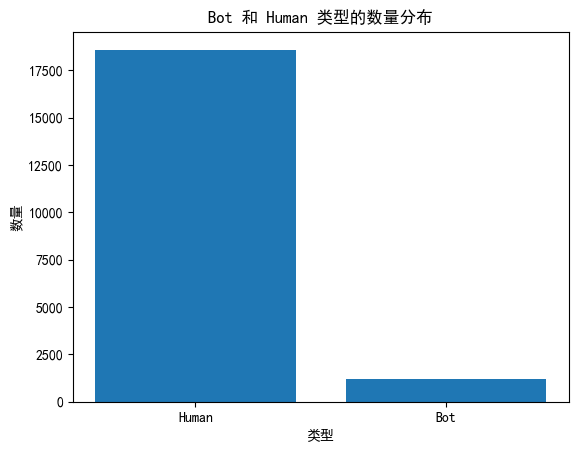

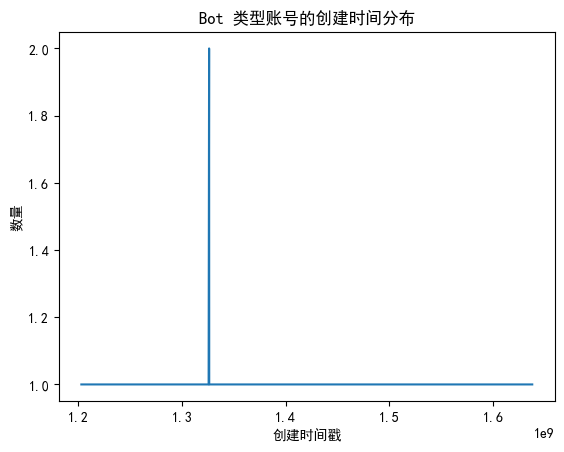

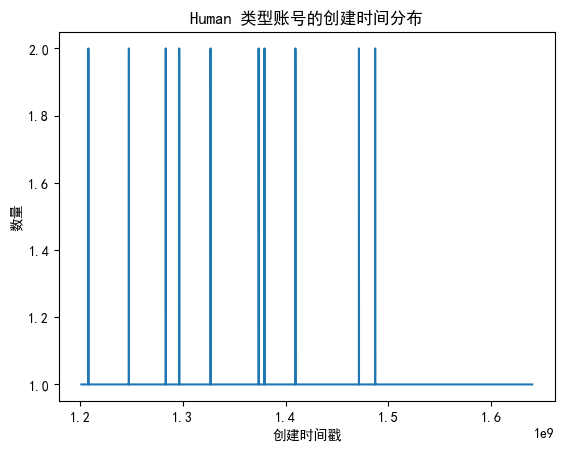

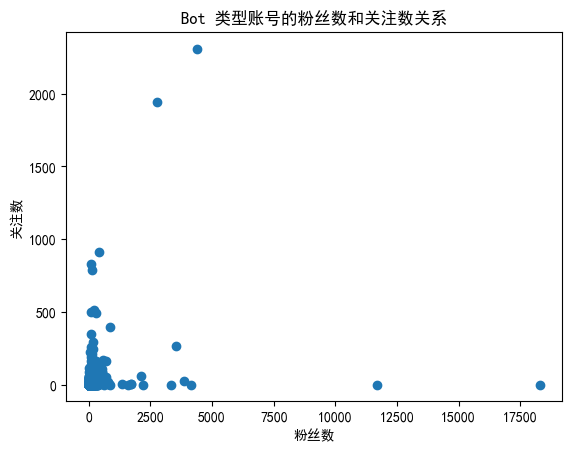

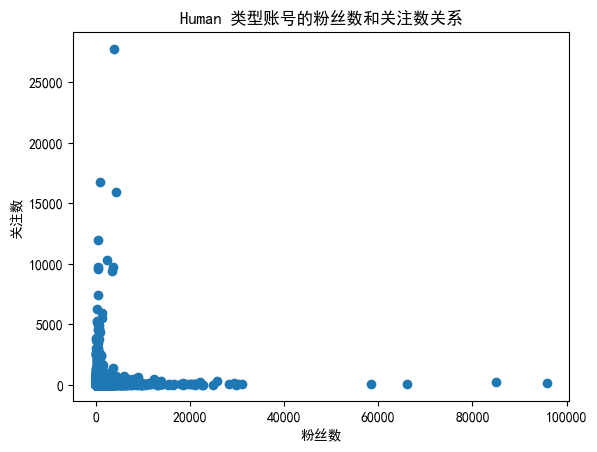

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
raw_data = pd.read_csv('data/github_bot_raw_data.csv')
data = raw_data[columns]

# 1. 删除重复数据，并输出去重前后的数据量
before_duplicate_removal = len(data)
data = data.drop_duplicates()
after_duplicate_removal = len(data)
print("去重前的数据量：", before_duplicate_removal)
print("去重后的数据量：", after_duplicate_removal)

# 2. 缺失值处理
# 去掉 gravatar_id 列
try:
    data = data.drop('gravatar_id', axis=1)
except KeyError:
    print("数据中不存在'gravatar_id'列，无需删除")
# 查看各列的缺失值情况
missing_values = data.isnull().sum()
print("各列的缺失值情况：")
print(missing_values)
# 将可转化成 boolean 变量的列字段转化成 boolean 变量，文本数据用空字符串填充空值
boolean_columns = ['site_admin', 'hireable']  # 假设这些列可以转化为布尔类型
for column in boolean_columns:
    try:
        data[column] = data[column].astype(bool)
    except ValueError:
        print(f"无法将'{column}'列转换为布尔类型")
data.fillna('', inplace=True)
# 再次查看各列有无缺失值
missing_values_after_processing = data.isnull().sum()
print("处理后各列的缺失值情况：")
print(missing_values_after_processing)

# 3. 数据变换，将created_at、updated_at转为时间戳
try:
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['created_at'] = data['created_at'].astype('int64') // 10**9
    data['updated_at'] = pd.to_datetime(data['updated_at'])
    data['updated_at'] = data['updated_at'].astype('int64') // 10**9
except KeyError:
    print("数据中不存在'created_at'或'updated_at'列，无法进行时间戳转换")

# 4. 数据可视化
# 4.1 可视化bot和human类型的情况
bot_human_counts = data['label'].value_counts()
plt.bar(bot_human_counts.index, bot_human_counts.values)
plt.xlabel('类型')
plt.ylabel('数量')
plt.title('Bot 和 Human 类型的数量分布')
plt.show()
# 选择柱状图是因为可以清晰地对比 bot 和 human 类型的数量差异

# 4.2 可视化bot类型账号的created_at情况
bot_data = data[data['label'] == 'Bot']
if not bot_data.empty:
    bot_data.loc[:, 'followers'] = bot_data['followers'].astype(int)  # 使用 loc 方法进行修改
    bot_data.loc[:, 'following'] = bot_data['following'].astype(int)  # 使用 loc 方法进行修改
    bot_created_at_counts = bot_data['created_at'].value_counts().sort_index()
    plt.plot(bot_created_at_counts.index, bot_created_at_counts.values)
    plt.xlabel('创建时间戳')
    plt.ylabel('数量')
    plt.title('Bot 类型账号的创建时间分布')
    plt.show()
else:
    print("没有'Bot'类型的账号数据，无法进行可视化")
# 选择折线图是因为可以更好地展示创建时间的趋势

# 4.3 可视化human类型账号的created_at情况
human_data = data[data['label'] == 'Human']
if not human_data.empty:
    human_data.loc[:, 'followers'] = human_data['followers'].astype(int)  # 使用 loc 方法进行修改
    human_data.loc[:, 'following'] = human_data['following'].astype(int)  # 使用 loc 方法进行修改
    human_created_at_counts = human_data['created_at'].value_counts().sort_index()
    plt.plot(human_created_at_counts.index, human_created_at_counts.values)
    plt.xlabel('创建时间戳')
    plt.ylabel('数量')
    plt.title('Human 类型账号的创建时间分布')
    plt.show()
else:
    print("没有'Human'类型的账号数据，无法进行可视化")
# 选择折线图是因为可以更好地展示创建时间的趋势

# 4.4 可视化bot类型账号的followers和following情况
if not bot_data.empty:
    plt.scatter(bot_data['followers'], bot_data['following'])
    plt.xlabel('粉丝数')
    plt.ylabel('关注数')
    plt.title('Bot 类型账号的粉丝数和关注数关系')
    plt.show()
else:
    print("没有'Bot'类型的账号数据，无法进行可视化")
# 选择散点图是因为可以展示两个变量之间的关系

# 4.5 可视化human类型账号的followers和following情况
if not human_data.empty:
    plt.scatter(human_data['followers'], human_data['following'])
    plt.xlabel('粉丝数')
    plt.ylabel('关注数')
    plt.title('Human 类型账号的粉丝数和关注数关系')
    plt.show()
else:
    print("没有'Human'类型的账号数据，无法进行可视化")
# 选择散点图是因为可以展示两个变量之间的关系